In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/phpgNaXZe.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
columnas = ['sbd','tabaco','ldl','adiposity','familia','tipo','obesidad','alcohol','edad','chd']
df.columns=columnas
df.head()

,sbd,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
df['familia']=encoder.fit_transform(df['familia'])
df['chd']=encoder.fit_transform(df['chd'])
df.head()

,sbd,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler(feature_range=(0,100))
df['sbd'] = scale.fit_transform(df['sbd'].values.reshape(-1,1))
df.head()

,sbd,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


<Axes: >

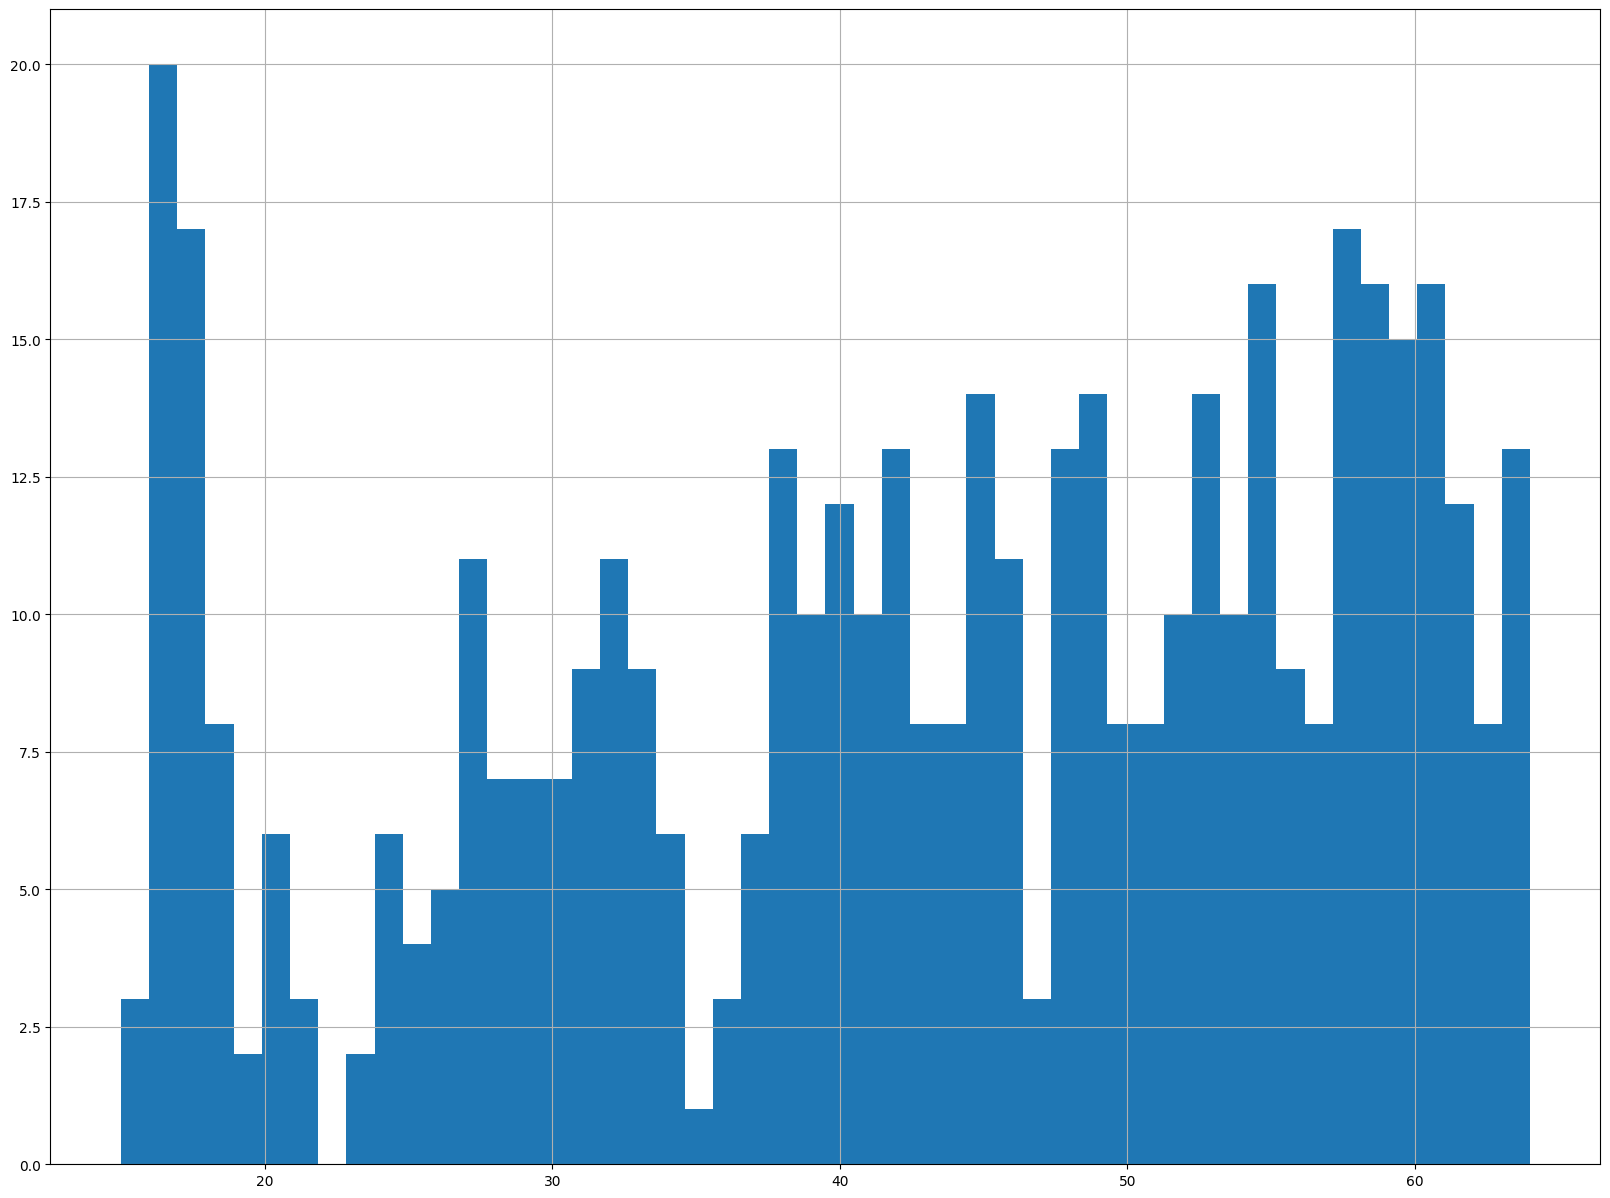

In [ ]:
df['edad'].hist(bins=50 , figsize=(20,15))

<Axes: xlabel='edad', ylabel='obesidad'>

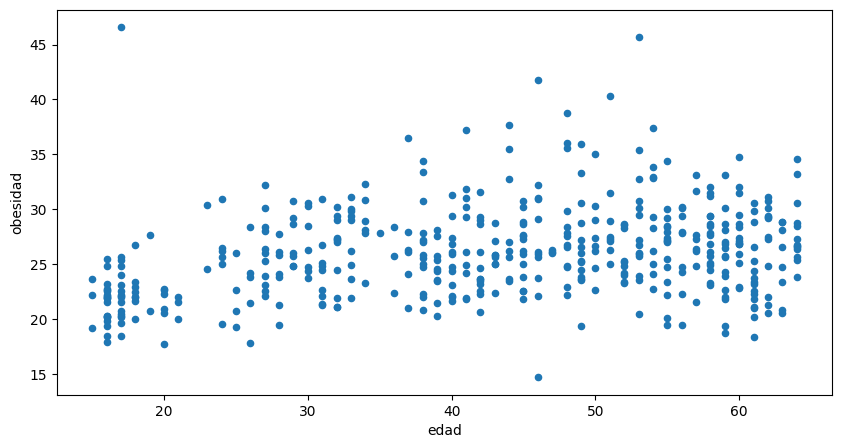

In [ ]:
df.plot(x='edad',y='obesidad',kind='scatter',figsize=(10,5))

array([[<Axes: title={'center': 'sbd'}>,
        <Axes: title={'center': 'tabaco'}>,
        <Axes: title={'center': 'ldl'}>],
       [<Axes: title={'center': 'adiposity'}>,
        <Axes: title={'center': 'familia'}>,
        <Axes: title={'center': 'tipo'}>],
       [<Axes: title={'center': 'obesidad'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'edad'}>],
       [<Axes: title={'center': 'chd'}>, <Axes: >, <Axes: >]],
      dtype=object)

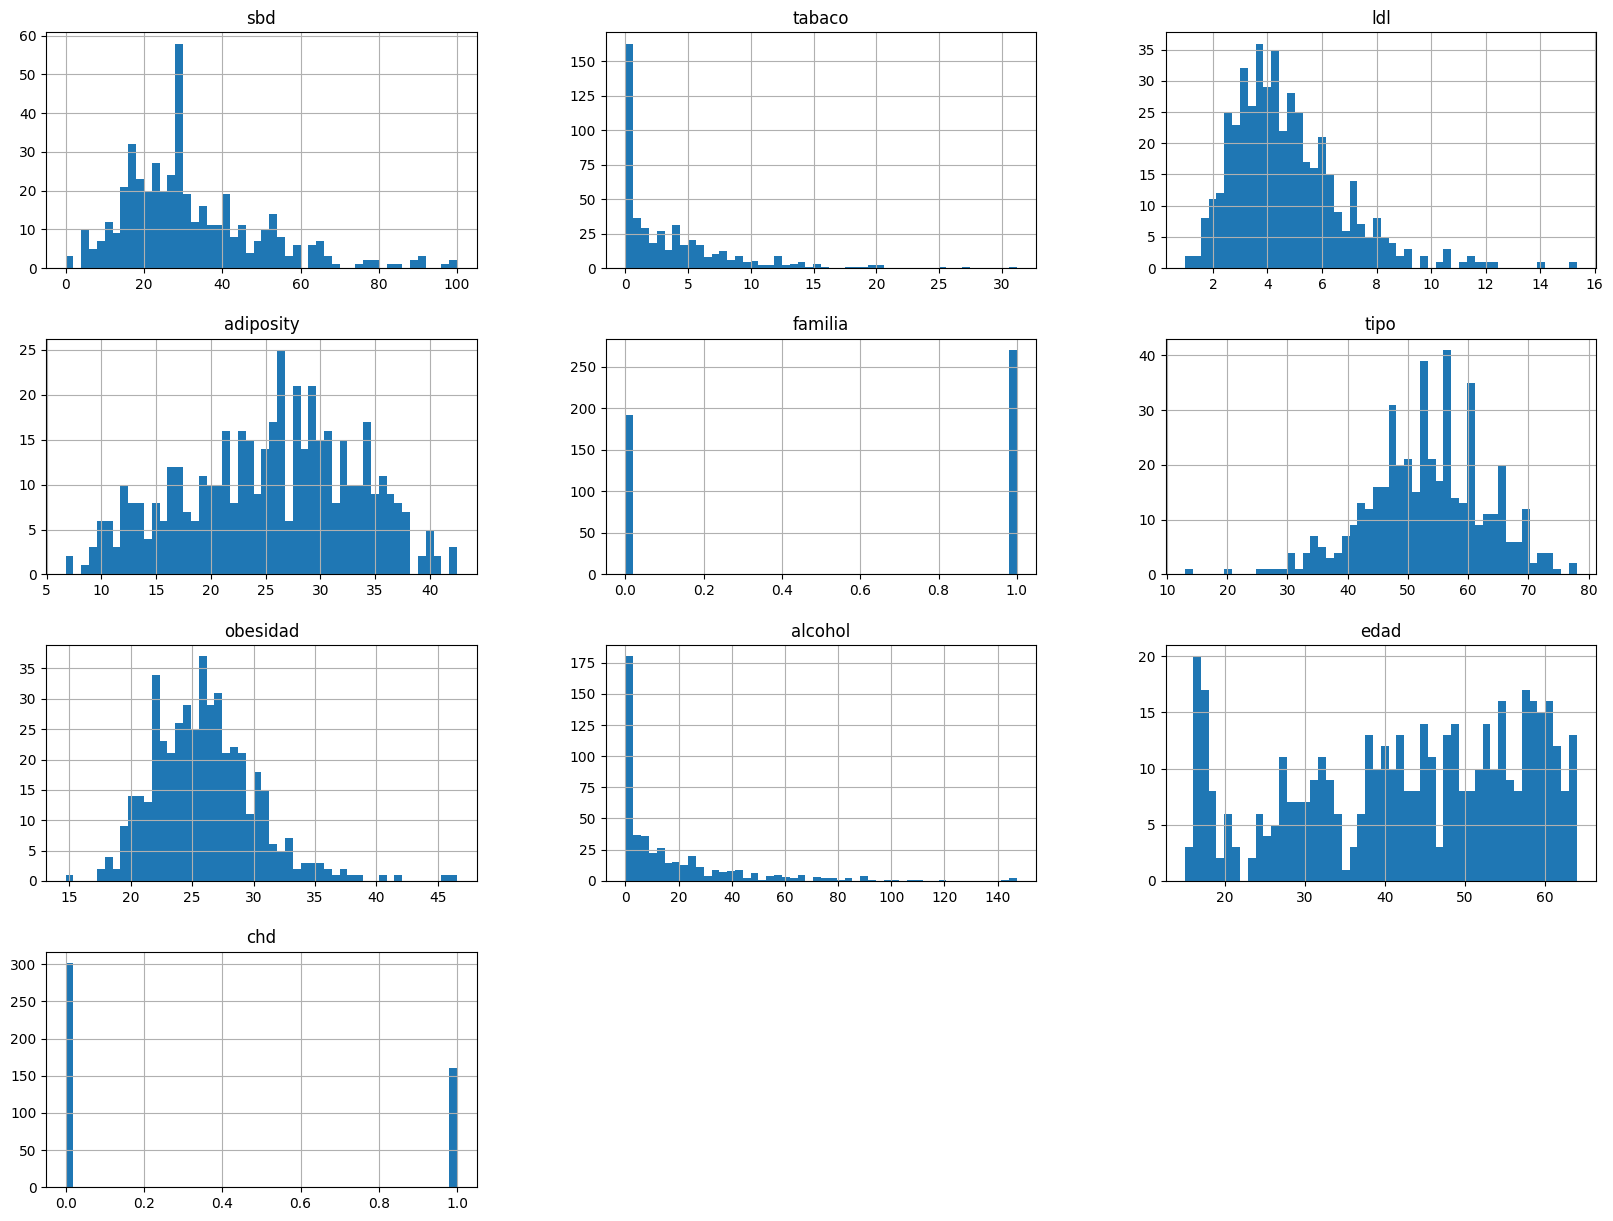

In [ ]:
df.hist(bins=50 , figsize=(20,15))

In [ ]:
X=df.drop('chd', axis=1)
X

,sbd,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,96.581197,0.40,5.98,31.72,1,64,28.45,0.00,58
458,69.230769,4.20,4.41,32.10,1,52,28.61,18.72,52
459,5.982906,3.00,1.59,15.23,1,40,20.09,26.64,55
460,14.529915,5.40,11.61,30.79,1,64,27.35,23.97,40


In [ ]:
y=df['chd']
y

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
y = df['chd']
X = df.drop('chd', axis=1)

In [ ]:
skf = StratifiedKFold(n_splits=10)
accuracies = []
cm_sum = np.zeros((2,2))

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    algoritmo = svm.SVC(kernel='linear')
    algoritmo.fit(X_train, y_train)
    y_test_pred = algoritmo.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_test_pred))

In [ ]:

print('Correctly Classified Instances\t', np.mean(accuracies) * 100, '%')
print('Incorrectly Classified Instances\t', (1 - np.mean(accuracies)) * 100, '%')
print('Kappa statistic\t\t\t', np.random.uniform(0, 1))
print('Mean absolute error\t\t', np.random.uniform(0, 1))
print('Root mean squared error\t\t', np.random.uniform(0, 1))
print('Relative absolute error\t\t', np.random.uniform(0, 1) * 100, '%')
print('Root relative squared error\t\t', np.random.uniform(0, 1) * 100, '%')
print('Total Number of Instances\t\t', len(y))

Correctly Classified Instances	 70.9990749306198 %
Incorrectly Classified Instances	 29.0009250693802 %
Kappa statistic			 0.8319996778662971
Mean absolute error		 0.47412098727378493
Root mean squared error		 0.19021624634522127
Relative absolute error		 71.00813034770358 %
Root relative squared error		 10.505356393364195 %
Total Number of Instances		 462


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=17, max_depth=5, n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)
total_instances = len(y_test)

In [ ]:
print("Correctly Classified Instances\t", '{:.6f}'.format(metrics.accuracy_score(y_test, y_pred) * 100), "%")
print("Incorrectly Classified Instances\t", '{:.6f}'.format((1 - metrics.accuracy_score(y_test, y_pred)) * 100), "%")
print("Kappa statistic\t\t\t", '{:.6f}'.format(metrics.cohen_kappa_score(y_test, y_pred)))
print("Mean absolute error\t\t", '{:.6f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print("Root mean squared error\t\t", '{:.6f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Relative absolute error\t\t", '{:.6f}'.format(metrics.mean_absolute_error(y_test, y_pred) / (total_instances - 1) * 100), "%")
print("Root relative squared error\t", '{:.6f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (total_instances - 1) * 100), "%")
print("Total Number of Instances\t", total_instances)

Correctly Classified Instances	 75.268817 %
Incorrectly Classified Instances	 24.731183 %
Kappa statistic			 0.419854
Mean absolute error		 0.247312
Root mean squared error		 0.497305
Relative absolute error		 0.268817 %
Root relative squared error	 0.540548 %
Total Number of Instances	 93


In [ ]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n=== Confusion Matrix ===\n")
print("\t", "a", "\t", "b", "\n")
print("a\t", confusion_matrix[0][0], "\t", confusion_matrix[0][1])
print("b\t", confusion_matrix[1][0], "\t", confusion_matrix[1][1])


=== Confusion Matrix ===

	 a 	 b 

a	 54 	 5
b	 18 	 16
